In [30]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Wavefunction generation
from scf_runs import run_lda_he, run_casci
scf_checkfile = "scf.hdf5"
mf_lda = run_lda_he(scf_checkfile)
ci_checkfile, mc = run_casci(scf_checkfile)

He atom neutral LDA spin=0
HF
converged SCF energy = -2.85516047724274  <S^2> = 0  2S+1 = 1
LDA
converged SCF energy = -2.82670655418611  <S^2> = 4.4408921e-16  2S+1 = 1

WARN: Mulitple states found in CASCI solver. First state is used to compute the Fock matrix and natural orbitals in active space.

CASCI state   0  E = -2.87015742152925  E(CI) = -2.87015742152925  S^2 = 0.0000000
CASCI state   1  E = -1.40116327670131  E(CI) = -1.40116327670131  S^2 = 2.0000000
CASCI state   2  E = -0.950953194776060  E(CI) = -0.950953194776060  S^2 = 0.0000000
CASCI state   3  E = 0.604815912795335  E(CI) = 0.604815912795335  S^2 = 0.0000000
dict_keys(['mol', '_scf', 'verbose', 'stdout', 'max_memory', 'ncas', 'nelecas', '_ncore', 'fcisolver', 'frozen', 'extrasym', 'e_tot', 'e_cas', 'ci', 'mo_coeff', 'mo_energy', 'mo_occ', 'converged'])
Available output from CASCI: <KeysViewHDF5 ['ci', 'fci', 'mo_coeff', 'ncas', 'nelecas']>


In [32]:
# Multi determinant boson new gradient
import importlib, bosonrecipes, bosonslater, bosonwftools
modules = [importlib, bosonrecipes, bosonslater, bosonwftools]
for m in modules:
    importlib.reload(m)

import importlib, slater, pyscftools,recipes, wftools, mc
modules = [importlib, slater, pyscftools,recipes, wftools, mc]
for m in modules:
    importlib.reload(m)


# import pyqmc.pyscftools as pyscftools

nconfig = 323
multi = False
if multi:
    mol, mf, mcc = pyscftools.recover_pyscf(scf_checkfile, ci_checkfile = ci_checkfile)
    target_root = 0
    if not hasattr(mcc.ci, "shape") or len(mcc.ci.shape) == 3:
        mcc.ci = mcc.ci[target_root]
else:
    mol, mf = pyscftools.recover_pyscf(scf_checkfile)
    mcc = None
    
wfb, to_opt = bosonwftools.generate_boson_wf(
        mol, mf, mc=mcc, jastrow=None, jastrow_kws=None, slater_kws=None
        )

wfs, to_opt = wftools.generate_wf(
        mol, mf, mc=mcc, jastrow=None, jastrow_kws=None, slater_kws=None
        )


Number of determinants in the bosonic wavefunction= 1


In [33]:
wfs

In [34]:
wfb

In [35]:
nconfig = 100
mol, mf = pyscftools.recover_pyscf(scf_checkfile)
configs = mc.initial_guess(mol, nconfig)
signb, phib = wfb.recompute(configs)
signs, phis = wfs.recompute(configs)


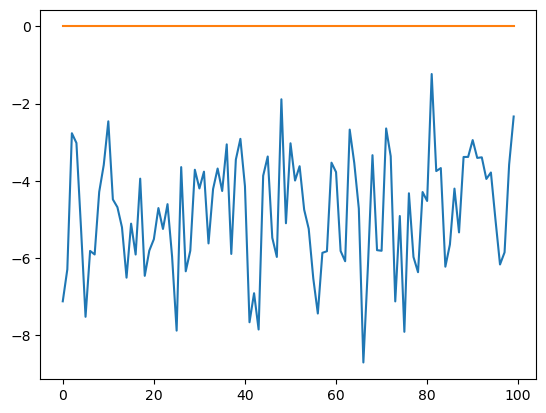

In [36]:
plt.plot(phib)
plt.plot(phib-phis)

In [37]:
e=0
gradb, valb, _ = wfb.gradient_value(e, configs.electron(e))
grads, vals, _ = wfs.gradient_value(e, configs.electron(e))

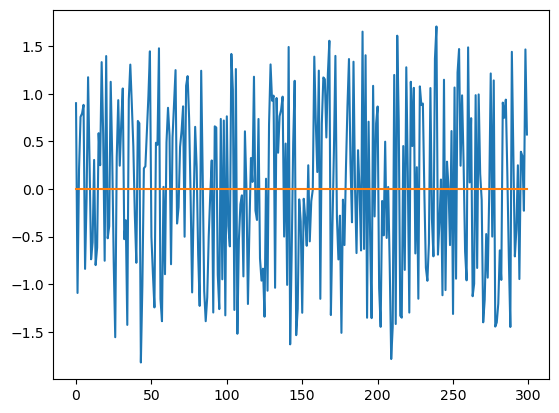

In [38]:
plt.plot(gradb.flatten())
plt.plot(gradb.flatten()-grads.flatten())

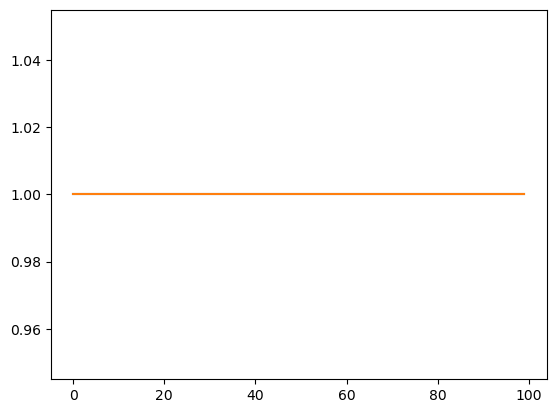

In [39]:
plt.plot(valb)
plt.plot(vals)

In [40]:
gradbr, _ = wfb.gradient_value_real(e, configs.electron(e))
gradbl, _, _ = wfb.gradient_value_log(e, configs.electron(e))

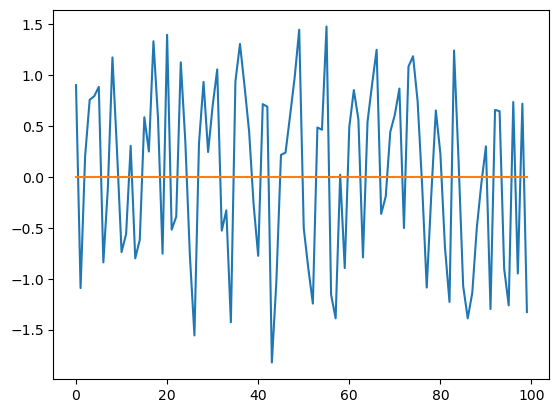

In [41]:
idx = 0
plt.plot(gradbl[idx])
plt.plot(gradbl[idx]-gradbr[idx]/np.exp(phib))